导入numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

定义目标函数

In [2]:

def target_function(x):
    return  3*x**3+ x**2 + 2*x + 1


生成数据

In [3]:
np.random.seed(42)
x_train = np.random.uniform(-1, 1, 100)
y_train = target_function(x_train)
x_test = np.linspace(-1, 1, 100)
y_test = target_function(x_test)

NumPy 实现两层 ReLU 网络

In [4]:
class NumPyReLUNet:
    def __init__(self, input_size=1, hidden_size=30, output_size=1, lr=0.05):
        self.lr = lr
        self.W1 = np.random.randn(input_size, hidden_size) * 0.1
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.1
        self.b2 = np.zeros((1, output_size))
    
    def relu(self, x):
        return np.maximum(0, x)
    
    def relu_derivative(self, x):
        return (x > 0).astype(float)
    
    def forward(self, x):
        self.z1 = x @ self.W1 + self.b1
        self.a1 = self.relu(self.z1)
        self.z2 = self.a1 @ self.W2 + self.b2
        return self.z2
    
    def backward(self, x, y, y_pred):
        loss_grad = 2 * (y_pred - y) / y.shape[0]
        dz2 = loss_grad
        dW2 = self.a1.T @ dz2
        db2 = np.sum(dz2, axis=0, keepdims=True)
        dz1 = (dz2 @ self.W2.T) * self.relu_derivative(self.z1)
        dW1 = x.T @ dz1
        db1 = np.sum(dz1, axis=0, keepdims=True)
        
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2
    
    def train(self, x, y, epochs=5000):
        for epoch in range(epochs):
            y_pred = self.forward(x)
            self.backward(x, y, y_pred)
            if epoch % 100 == 0:
                loss = np.mean((y_pred - y) ** 2)
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

训练 NumPy 网络

In [5]:
x_train_np = x_train.reshape(-1, 1)
y_train_np = y_train.reshape(-1, 1)
x_test_np = x_test.reshape(-1, 1)
numpy_model = NumPyReLUNet()
numpy_model.train(x_train_np, y_train_np)

y_pred_numpy = numpy_model.forward(x_test_np)

Epoch 0, Loss: 6.4804
Epoch 100, Loss: 0.2750
Epoch 200, Loss: 0.2600
Epoch 300, Loss: 0.2416
Epoch 400, Loss: 0.2104
Epoch 500, Loss: 0.1702
Epoch 600, Loss: 0.1316
Epoch 700, Loss: 0.1030
Epoch 800, Loss: 0.0866
Epoch 900, Loss: 0.0776
Epoch 1000, Loss: 0.0724
Epoch 1100, Loss: 0.0693
Epoch 1200, Loss: 0.0676
Epoch 1300, Loss: 0.0664
Epoch 1400, Loss: 0.0656
Epoch 1500, Loss: 0.0649
Epoch 1600, Loss: 0.0640
Epoch 1700, Loss: 0.0625
Epoch 1800, Loss: 0.0608
Epoch 1900, Loss: 0.0588
Epoch 2000, Loss: 0.0564
Epoch 2100, Loss: 0.0534
Epoch 2200, Loss: 0.0498
Epoch 2300, Loss: 0.0458
Epoch 2400, Loss: 0.0414
Epoch 2500, Loss: 0.0368
Epoch 2600, Loss: 0.0323
Epoch 2700, Loss: 0.0281
Epoch 2800, Loss: 0.0242
Epoch 2900, Loss: 0.0207
Epoch 3000, Loss: 0.0178
Epoch 3100, Loss: 0.0152
Epoch 3200, Loss: 0.0130
Epoch 3300, Loss: 0.0112
Epoch 3400, Loss: 0.0096
Epoch 3500, Loss: 0.0084
Epoch 3600, Loss: 0.0074
Epoch 3700, Loss: 0.0066
Epoch 3800, Loss: 0.0060
Epoch 3900, Loss: 0.0055
Epoch 4000, 

可视化结果

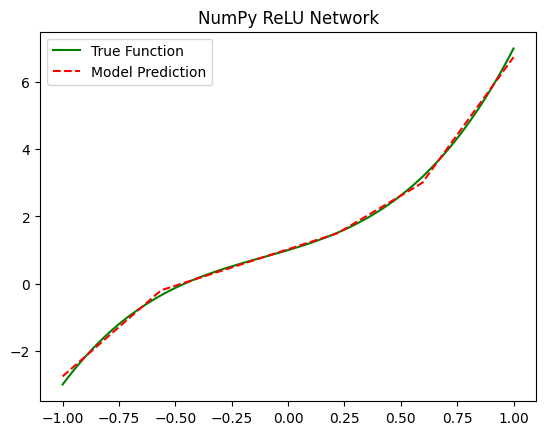

In [6]:
def plot_results(x_test, y_test, y_pred, title):
    plt.plot(x_test, y_test, label='True Function', color='green')
    plt.plot(x_test, y_pred, label='Model Prediction', color='red', linestyle='dashed')
    plt.legend()
    plt.title(title)
    plt.show()

plot_results(x_test, y_test, y_pred_numpy, "NumPy ReLU Network")